In [24]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt


In [25]:
%matplotlib inline

In [26]:
def flip():
    """Simulates a coin flip to return 'heads' or 'tails'"""
    return random.choice(["heads", "tails"])

In [27]:
def flips(n = 16):
    """Flips coin 2^n number of times and records the heads and tails count at intervals of
    2^0, 2^1, 2^2"""
    counter = 0
    head_count = []
    tail_count = []
    heads = 0
    tails = 0
    while counter < (2 ** n):
        result = flip()
        if result == "heads":
            heads += 1
        else:
            tails += 1
        counter += 1
        for i in range(n+1):
            if counter == 2 ** i:
                head_count.append(heads)
                tail_count.append(tails)
    return head_count, tail_count

In [28]:
y = flip()

In [29]:
print(y)

heads


In [30]:
a, b = flips()

In [31]:
print(a)
print(b)

[0, 0, 1, 3, 5, 14, 32, 61, 117, 249, 500, 996, 2046, 4071, 8194, 16345, 32728]
[1, 2, 3, 5, 11, 18, 32, 67, 139, 263, 524, 1052, 2050, 4121, 8190, 16423, 32808]


In [32]:
diff = [a[i] - b[i] for i in range(len(a))]

In [33]:
print(diff)

[-1, -2, -2, -2, -6, -4, 0, -6, -22, -14, -24, -56, -4, -50, 4, -78, -80]


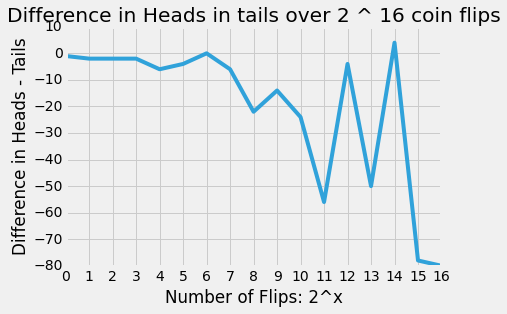

In [38]:
with plt.style.context('fivethirtyeight'):
    x1 = [str(i) for i in range(17)]
    y1 = diff
    plt.plot(diff)
    plt.xticks(range(17), x1)
    plt.xlabel("Number of Flips: 2^x")
    plt.ylabel("Difference in Heads - Tails")
    plt.title("Difference in Heads in tails over 2 ^ 16 coin flips")
    plt.show()

In [39]:
ratio = [a[i]/b[i] for i in range(len(a))]

In [40]:
print(ratio)

[0.0, 0.0, 0.3333333333333333, 0.6, 0.45454545454545453, 0.7777777777777778, 1.0, 0.9104477611940298, 0.841726618705036, 0.9467680608365019, 0.9541984732824428, 0.9467680608365019, 0.9980487804878049, 0.987867022567338, 1.0004884004884005, 0.9952505632344882, 0.9975615703486954]


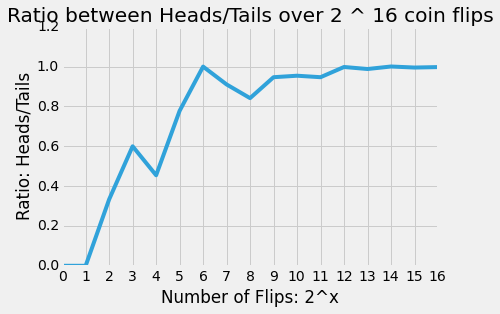

In [47]:
with plt.style.context('fivethirtyeight'):
    x1 = [str(i) for i in range(17)]
    y1 = ratio
    plt.plot(ratio)
    plt.xticks(range(17), x1)
    plt.xlabel("Number of Flips: 2^x")
    plt.ylabel("Ratio: Heads/Tails")
    plt.title("Ratio between Heads/Tails over 2 ^ 16 coin flips")
    plt.show()

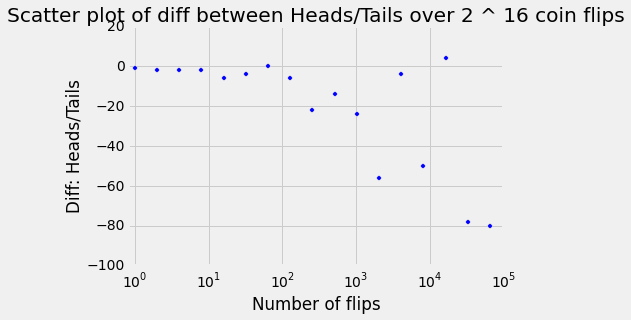

In [62]:
with plt.style.context('fivethirtyeight'):
    x1 = [2**i for i in range(17)]
    y1 = diff
    plt.scatter(x1, y1)
    plt.xscale('log')
    plt.xlabel("Number of flips")
    plt.ylabel("Diff: Heads/Tails")
    plt.title("Scatter plot of diff between Heads/Tails over 2 ^ 16 coin flips")
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([.8, xmax, ymin, ymax])
    plt.show()

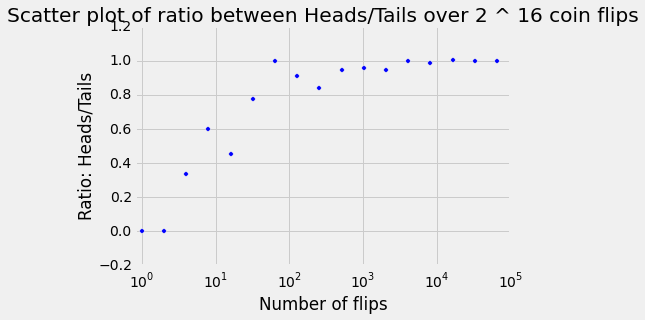

In [61]:
with plt.style.context('fivethirtyeight'):
    x1 = [2**i for i in range(17)]
    y1 = ratio
    plt.scatter(x1, y1)
    plt.xscale('log')
    plt.xlabel("Number of flips")
    plt.ylabel("Ratio: Heads/Tails")
    plt.title("Scatter plot of ratio between Heads/Tails over 2 ^ 16 coin flips")
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([.8, xmax, ymin, ymax])
    plt.show()

##Notes
Need to 

In [83]:
def sim_many(n = 20):
    results = {}
    for i in range(n):
        num_heads, num_tails = flips()    
        results[i] = (num_heads, num_tails)
    return results

In [86]:
data_set = sim_many()

In [85]:
print((data_set)[0])

([0, 0, 0, 3, 5, 12, 29, 59, 127, 236, 489, 1002, 1990, 4057, 8208, 16377, 32691], [1, 2, 4, 5, 11, 20, 35, 69, 129, 276, 535, 1046, 2106, 4135, 8176, 16391, 32845])


In [111]:
def sim_create_data_dict(n = 20):
    ratio_dict = {}
    for x in range((17)):
        ratio_dict[x] = []
    for i in range(n):
        num_heads, num_tails = flips()
        for j in range(len(num_heads)):
            if num_tails[j] == 0:
                ratio_dict[j].append(0)
            else:
                ratio_dict[j].append(num_heads[j]/num_tails[j])
    return ratio_dict            

In [112]:
new_data_set = sim_create_data_dict()

In [115]:
print(new_data_set[1])

[0, 1.0, 1.0, 0, 1.0, 1.0, 0.0, 1.0, 1.0, 0, 0.0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0]


In [124]:
def mean_of_each_data_point(data_set):
    return [st.mean(v) for k, v in data_set.items()]
    

In [127]:
ratio_data_list = mean_of_each_data_point(new_data_set)
print(ratio_data_list)

[0.0, 0.55, 1.3166666666666667, 1.3038095238095238, 1.1422510822510823, 1.066804533615679, 0.964441529716672, 0.9919409904475159, 0.9910343053775199, 1.0029248358056202, 1.0065191167668137, 1.0012022903684292, 0.9863710319055826, 0.992105115996894, 0.9960057021604808, 0.9976940293274644, 0.9987398417516843]


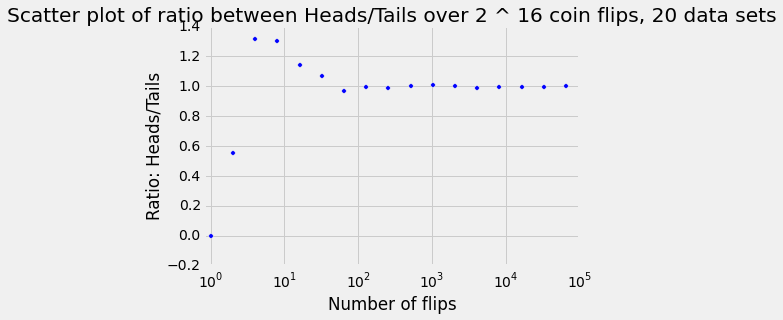

In [132]:
with plt.style.context('fivethirtyeight'):
    x1 = [2**i for i in range(17)]
    y1 = ratio_data_list
    plt.scatter(x1, y1)
    plt.xscale('log')
    plt.xlabel("Number of flips")
    plt.ylabel("Ratio: Heads/Tails ")
    plt.title("Scatter plot of ratio between Heads/Tails over 2 ^ 16 coin flips, 20 data sets")
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([.8, xmax, ymin, ymax])
    plt.show()

In [129]:
def sd_of_each_data_point(data_set):
    return [st.stdev(v) for k, v in data_set.items()]

In [131]:
sd_data_list = sd_of_each_data_point(new_data_set)
print(sd_data_list)

[0.0, 0.5104177855340405, 1.0455978451590122, 0.9631764094905052, 0.5590966724519537, 0.5065285912824886, 0.275713363357782, 0.1783727991098717, 0.09297833984905847, 0.053529782825078524, 0.04682175688970383, 0.03622625266978484, 0.028403851697259192, 0.01930306127729439, 0.012535602400643065, 0.011165266968661582, 0.009417070891688046]


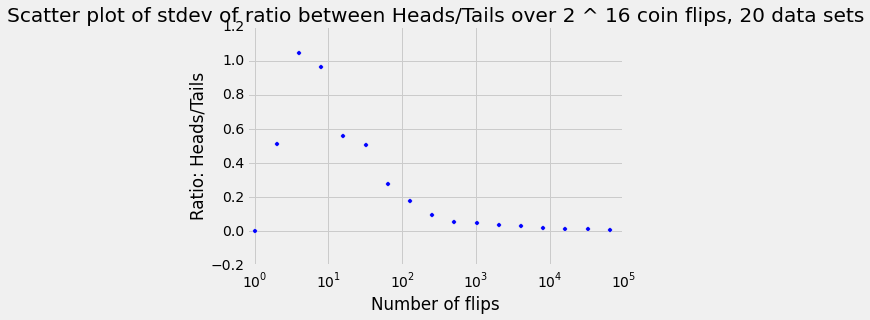

In [133]:
with plt.style.context('fivethirtyeight'):
    x1 = [2**i for i in range(17)]
    y1 = sd_data_list
    plt.scatter(x1, y1)
    plt.xscale('log')
    plt.xlabel("Number of flips")
    plt.ylabel("Ratio: Heads/Tails")
    plt.title("Scatter plot of stdev of ratio between Heads/Tails over 2 ^ 16 coin flips, 20 data sets")
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([.8, xmax, ymin, ymax])
    plt.show()

In [134]:
def ratio_heads_tails_flip_n_times(n=100):
    """Flips coin n times and returns the ratio of heads to tails for that data set."""
    counter = 0
    heads = 0
    tails = 0
    while counter < (n):
        result = flip()
        if result == "heads":
            heads += 1
        else:
            tails += 1
        counter += 1
    return (heads/tails)
    

In [135]:
ratio_heads_trial = ratio_heads_tails_flip_n_times()
print(ratio_heads_trial)

0.8181818181818182


In [138]:
def run_trial_x_times(number_of_trials, n=100):
    results_list = []
    for i in range(number_of_trials):
        results_list.append(ratio_heads_tails_flip_n_times(n))
    return results_list

In [139]:
ratio_list_1000 = run_trial_x_times(1000)
print(len(ratio_list_1000))
print(ratio_list_1000[656])

1000
1.2727272727272727


In [140]:
results_100000_by_100 = run_trial_x_times(100000)
results_100000_by_1000 = run_trial_x_times(100000, 1000)

In [141]:
len(results_100000_by_100)

100000

In [142]:
len(results_100000_by_1000)

100000

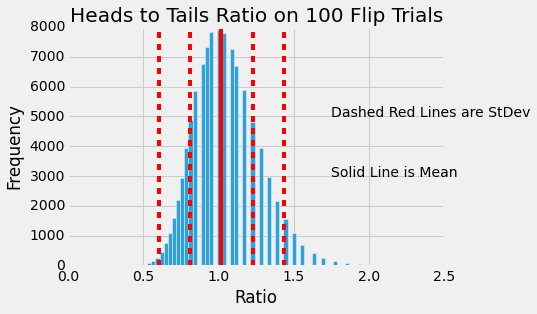

In [153]:
plt.hist(results_100000_by_100, bins = 75)

ymin, ymax = plt.ylim()
mean = st.mean(results_100000_by_100)
stdev = st.stdev(results_100000_by_100)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Heads to Tails Ratio on 100 Flip Trials")
plt.text( 1.75, 5000, 'Dashed Red Lines are StDev')
plt.text( 1.75, 3000, 'Solid Line is Mean')
plt.show()

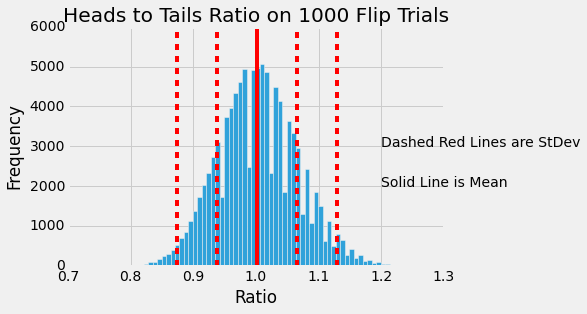

In [155]:
plt.hist(results_100000_by_1000, bins = 75)

ymin, ymax = plt.ylim()
mean = st.mean(results_100000_by_1000)
stdev = st.stdev(results_100000_by_1000)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Heads to Tails Ratio on 1000 Flip Trials")
plt.text( 1.2, 3000, 'Dashed Red Lines are StDev')
plt.text( 1.2, 2000, 'Solid Line is Mean')
plt.show()

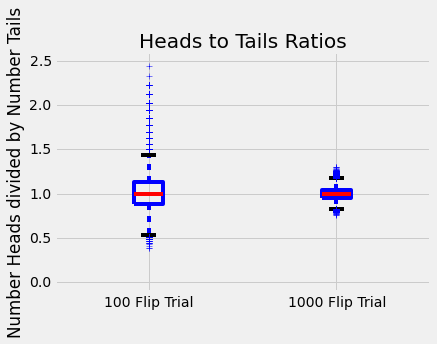

In [156]:

plt.boxplot([results_100000_by_100, results_100000_by_1000])
ymin, ymax = plt.ylim()
plt.ylim(ymin - .1, ymax + .1)
plt.title("Heads to Tails Ratios")
plt.ylabel("Number Heads divided by Number Tails")
plt.xticks(range(1,3), ["100 Flip Trial", "1000 Flip Trial"])
plt.show()